<img src="imagens/logo-RS-01.png"  width="500" height="600" align = "center">

<h2> Tratando Variáveis Qualitativas </h2> </br>
Base de dados contém informações sobre os campeonatos brasileiros de 2003 a 2022. Este dataset é sobre cartões, contemplando: quem recebeu o cartão, tipo (amarelho ou vermelho), quando (minuto),  nome do atletla entre outras informações.
Referência:
https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol?resource=download&select=campeonato-brasileiro-cartoes.csv

<img src="imagens/variaveis.PNG"  width="700" height="700" align = "center">

Variável Quantitativa é resultado de uma contagem ou mensuração.
Variável Qualitativa(Categórica) é um tipo que variável que expressa categoria, classificação de algo. Os valores não podem ser espressados em quantidades. Há dois tipos: nominais e ordinais. Ordinais há ordenação entre as categorias, enquanto as nominais não. Exemplo de ordinais: nível de escolaridade, meses do ano. Exemplo de nominais: cor de olhos. </br>
Obserção: as variáveis qualitativas podem ser representados por strings, inteiros, valores reais, entre outros, cabendo sempre a observação do cientista para identificá-la. </br>
**Exemplos de Técnicas Encoders**: </br>

1 - Ordinal. Tipo Clássico. </br>
2 - One Hot. Tipo Clássico. </br>
Os classicos oferem uma representação numérica da categoria.

Importação de Pacotes Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
import seaborn as sns

<h3> Análise Exploratória de Dados (EDA) </h3>

In [2]:
# Obtendo os dados
campeonate_cartoes = pd.read_csv("bases/campeonato-brasileiro-cartoes.csv")

In [3]:
campeonate_cartoes.shape

(16739, 8)

In [4]:
campeonate_cartoes.columns

Index(['partida_id', 'rodata', 'clube', 'cartao', 'atleta', 'num_camisa',
       'posicao', 'minuto'],
      dtype='object')

In [5]:
type(campeonate_cartoes)

pandas.core.frame.DataFrame

In [6]:
campeonate_cartoes.head(10)

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto
0,4607,1,Figueirense,Amarelo,Paulo Roberto da Silva,28.0,NaN,66
1,4608,1,Internacional,Amarelo,Andrés D'Alessandro,10.0,Meio-campo,72
2,4608,1,Vitoria,Amarelo,Marcelo Machado dos Santos,29.0,NaN,86
3,4608,1,Vitoria,Amarelo,Mansur,NaN,Zagueiro,10
4,4607,1,Figueirense,Amarelo,Thiago Heleno,4.0,Zagueiro,44
5,4608,1,Internacional,Amarelo,Juan Silveira dos Santos,4.0,Zagueiro,20
6,4608,1,Vitoria,Amarelo,Vinícius Santos Silva,NaN,NaN,82
7,4609,1,Coritiba,Amarelo,Carlos Emiliano Pereira,30.0,Zagueiro,76
8,4615,1,Sport,Amarelo,Luiz Antonio Linhares Garcia,13.0,Zagueiro,55
9,4616,1,Criciuma,Amarelo,Silvinho,NaN,Atacante,72


In [7]:
# Tipos de dados
# por trás o PYTHON salva as strings como OBJECT, tipo do numpy
campeonate_cartoes.dtypes

partida_id      int64
rodata          int64
clube          object
cartao         object
atleta         object
num_camisa    float64
posicao        object
minuto         object
dtype: object

In [8]:
campeonate_cartoes['clube'].dtypes

dtype('O')

In [9]:
# Sériue = como se fosse uma coluna no excel. Matriz unidimensional, podendo ser manipulada via índice.
type(campeonate_cartoes['clube'])

pandas.core.series.Series

<h4> Variável clube </h4>

In [11]:
print('Qtde de CLUBES únicos ',len(campeonate_cartoes['clube'].unique()))

Qtde de CLUBES únicos  34


In [12]:
print('CLUBES únicos ',campeonate_cartoes['clube'].unique())

CLUBES únicos  ['Figueirense' 'Internacional' 'Vitoria' 'Coritiba' 'Sport' 'Criciuma'
 'Palmeiras' 'Athletico-PR' 'Gremio' 'Botafogo-RJ' 'Bahia' 'Cruzeiro'
 'Flamengo' 'Goias' 'Santos' 'Sao Paulo' 'Fluminense' 'Corinthians'
 'Atletico-MG' 'Chapecoense' 'Joinville' 'Ponte Preta' 'Avai' 'Vasco'
 'Santa Cruz' 'America-MG' 'Atletico-GO' 'Ceara' 'Parana' 'Fortaleza'
 'CSA' 'Bragantino' 'Cuiaba' 'Juventude']


In [13]:
campeonate_cartoes_agrupado = campeonate_cartoes.groupby('clube').count().loc[:,'partida_id'].rename("Qtde de amostras")
campeonate_cartoes_agrupado = campeonate_cartoes_agrupado.sort_values(ascending=False)
campeonate_cartoes_agrupado

clube
Sao Paulo        845
Palmeiras        842
Santos           840
Fluminense       830
Internacional    823
Athletico-PR     766
Flamengo         764
Atletico-MG      759
Gremio           730
Corinthians      693
Botafogo-RJ      661
Coritiba         641
Sport            611
Chapecoense      587
Cruzeiro         563
Bahia            556
Vasco            546
Ceara            504
Goias            499
Vitoria          417
Avai             406
Atletico-GO      373
Fortaleza        357
Figueirense      324
America-MG       321
Ponte Preta      308
Bragantino       264
Juventude        210
Cuiaba           172
Criciuma         121
Parana           109
Joinville        107
CSA               95
Santa Cruz        95
Name: Qtde de amostras, dtype: int64

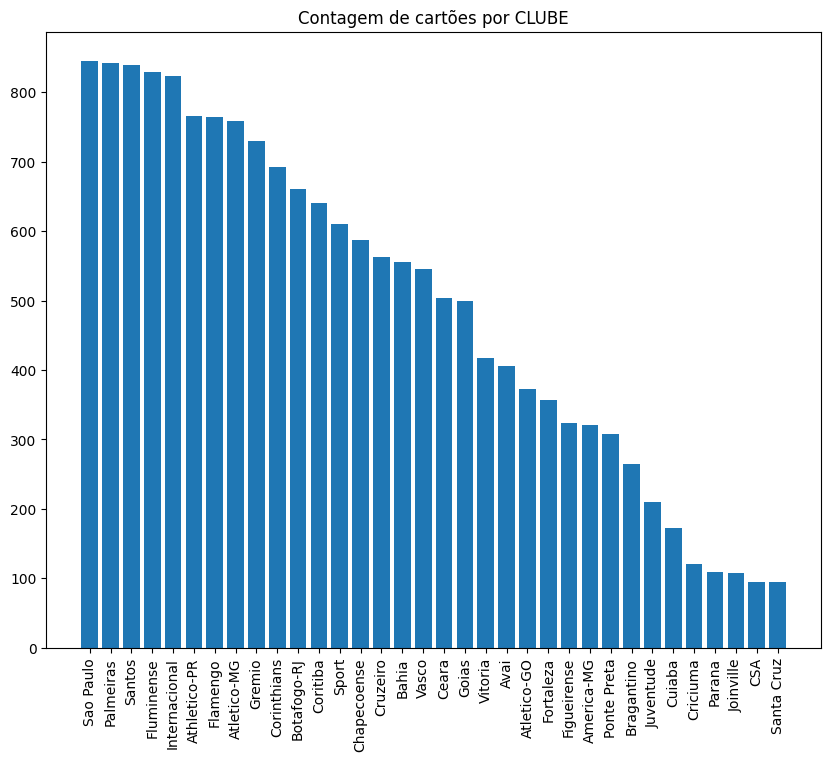

In [15]:
plt.figure(figsize = (10,8))
x = campeonate_cartoes_agrupado.index
height = campeonate_cartoes_agrupado.values
plt.bar(x, height)
plt.title('Contagem de cartões por CLUBE')
plt.xticks(rotation = 90)
plt.show()

<h4> Variável CARTÃO </h4>

In [16]:
print('Qtde de CARTÕES únicos ',len(campeonate_cartoes['cartao'].unique()))

Qtde de CARTÕES únicos  2


In [17]:
campeonate_cartoes['cartao'].nunique()

2

In [18]:
campeonate_cartoes['cartao'].unique()

array(['Amarelo', 'Vermelho'], dtype=object)

In [19]:
campeonate_cartoes_agrupado_c = campeonate_cartoes.groupby('cartao').count().loc[:,'partida_id'].rename("Qtde de amostras")
campeonate_cartoes_agrupado_c = campeonate_cartoes_agrupado_c.sort_values(ascending=False)
campeonate_cartoes_agrupado_c

cartao
Amarelo     15889
Vermelho      850
Name: Qtde de amostras, dtype: int64

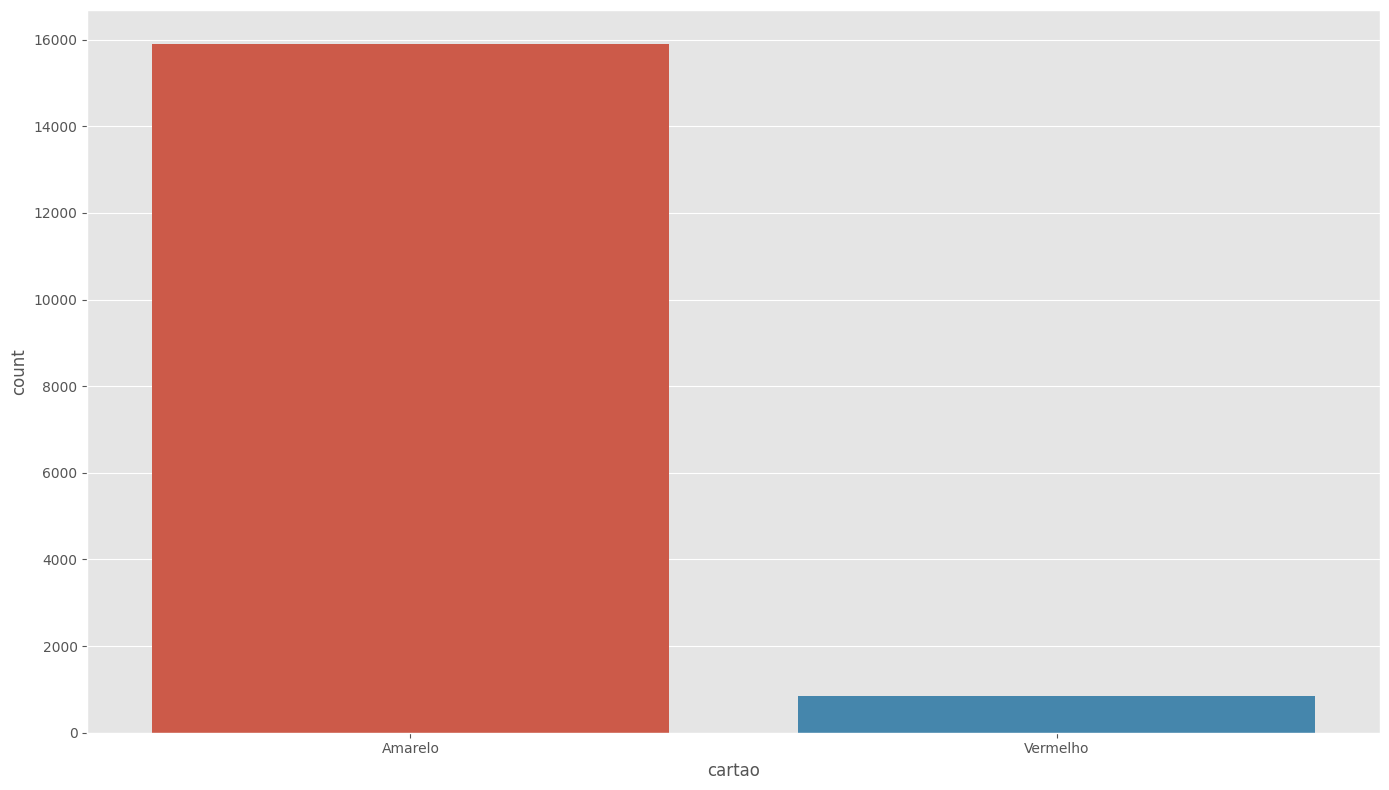

In [20]:
plt.style.use("ggplot")
fig, _ = plt.subplots(1, figsize=(14,8))
ax = sns.countplot(x="cartao", data=campeonate_cartoes)
fig.tight_layout()

<h4> Aplicação do ORDINAL ENCODER </h4>

In [1]:
# Aplica um mapeamento entre cada categoria e um valor numérico (de forma exclusiva).
# ORDINAL porque requer uma ordem entre as categorias

In [24]:
# Aplicação na varíavel CARTÃO
ordinal_encoder = OrdinalEncoder()
campeonate_cartoes["cartao_numerico"] = ordinal_encoder.fit_transform(campeonate_cartoes.cartao.values.reshape(-1,1))
campeonate_cartoes["cartao_numerico"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16734    0.0
16735    0.0
16736    0.0
16737    0.0
16738    0.0
Name: cartao_numerico, Length: 16739, dtype: float64

In [26]:
campeonate_cartoes[["cartao","cartao_numerico"]].head(5)

,cartao,cartao_numerico
0,Amarelo,0.0
1,Amarelo,0.0
2,Amarelo,0.0
3,Amarelo,0.0
4,Amarelo,0.0


In [27]:
# Visualizando os valores únicos
campeonate_cartoes["cartao_numerico"].unique()

array([0., 1.])

In [28]:
# Visualizando qual é o numérico associado ao cartão vermelho
campeonate_cartoes.query("cartao == 'Vermelho'").head(5).loc[:,"cartao_numerico"]

64     1.0
79     1.0
80     1.0
89     1.0
131    1.0
Name: cartao_numerico, dtype: float64

In [ ]:
campeonate_cartoes["clube"]

In [24]:
campeonate_cartoes["cartao_numerico"].nunique()

2

In [23]:
campeonate_cartoes["cartao"].nunique()

2

In [21]:
campeonate_cartoes

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto
0,4607,1,Figueirense,Amarelo,Paulo Roberto da Silva,28.0,NaN,66
1,4608,1,Internacional,Amarelo,Andrés D'Alessandro,10.0,Meio-campo,72
2,4608,1,Vitoria,Amarelo,Marcelo Machado dos Santos,29.0,NaN,86
3,4608,1,Vitoria,Amarelo,Mansur,NaN,Zagueiro,10
4,4607,1,Figueirense,Amarelo,Thiago Heleno,4.0,Zagueiro,44
...,...,...,...,...,...,...,...,...
16734,8023,38,Atletico-MG,Amarelo,Jemerson de Jesus Nascimento,34.0,Zagueiro,45+2
16735,8024,38,Internacional,Amarelo,Lucas Ramos,37.0,Meio-campo,80
16736,8024,38,Palmeiras,Amarelo,José Manuel Alberto López,18.0,Meio-campo,88
16737,8024,38,Palmeiras,Amarelo,Eduard Atuesta,20.0,Meio-campo,23


In [22]:
# Aplicação na varíavel CLUBE
ordinal_encoder = OrdinalEncoder()
ordinal_encoder = ordinal_encoder.fit(campeonate_cartoes[["clube"]])
campeonate_cartoes["clube_numerico"] = ordinal_encoder.transform(campeonate_cartoes[["clube"]])
campeonate_cartoes["clube_numerico"]

0        16.0
1        22.0
2        33.0
3        33.0
4        16.0
         ... 
16734     3.0
16735    22.0
16736    25.0
16737    25.0
16738    20.0
Name: clube_numerico, Length: 16739, dtype: float64

In [23]:
campeonate_cartoes[["clube","clube_numerico"]]

,clube,clube_numerico
0,Figueirense,16.0
1,Internacional,22.0
2,Vitoria,33.0
3,Vitoria,33.0
4,Figueirense,16.0
...,...,...
16734,Atletico-MG,3.0
16735,Internacional,22.0
16736,Palmeiras,25.0
16737,Palmeiras,25.0


In [29]:
print("Qtde de CLUBES MAPEADOS",campeonate_cartoes["clube_numerico"].nunique())
print("Qtde de CLUBES ORIGINAIS",campeonate_cartoes["clube"].nunique())

Qtde de CLUBES MAPEADOS 34
Qtde de CLUBES ORIGINAIS 34


In [30]:
print("Estatística de MAPEAMENTO")
campeonate_cartoes["clube_numerico"].describe()

Estatística de MAPEAMENTO


count    16739.000000
mean        16.612641
std          9.967939
min          0.000000
25%          8.000000
50%         17.000000
75%         25.000000
max         33.000000
Name: clube_numerico, dtype: float64

In [32]:
# Operação inversa, ou seja, o valor ORIGINAL
# ordinal_encoder.inverse_transform(campeonate_cartoes[["clube_numerico"]])

In [ ]:
type(ordinal_encoder)

sklearn.preprocessing._encoders.OrdinalEncoder

<h4> Aplicação do ONE HOT ENCODING </h4>

In [ ]:
# Criação de um vetor, no qual mapeamos cada CATEGORIA em uma ENTRADA DESSE VETOR.
# Cada Categoria tem sua própria entrada (1) e os demais campos ficam zerados.

<img src="imagens/tecnica_one.png" align = "center">

In [33]:
# Aplicação na variável CARTÃO
# Uma possibilidade
campeonate_cartoes_categorias = pd.get_dummies(campeonate_cartoes[["cartao"]])
campeonate_cartoes_categorias

,cartao_Amarelo,cartao_Vermelho
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
16734,1,0
16735,1,0
16736,1,0
16737,1,0


In [39]:
campeonato_final = pd.concat([campeonate_cartoes,campeonate_cartoes_categorias],axis = 1)
campeonato_final

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto,cartao_numerico,clube_numerico,cartao_Amarelo,cartao_Vermelho
0,4607,1,Figueirense,Amarelo,Paulo Roberto da Silva,28.0,NaN,66,0.0,16.0,1,0
1,4608,1,Internacional,Amarelo,Andrés D'Alessandro,10.0,Meio-campo,72,0.0,22.0,1,0
2,4608,1,Vitoria,Amarelo,Marcelo Machado dos Santos,29.0,NaN,86,0.0,33.0,1,0
3,4608,1,Vitoria,Amarelo,Mansur,NaN,Zagueiro,10,0.0,33.0,1,0
4,4607,1,Figueirense,Amarelo,Thiago Heleno,4.0,Zagueiro,44,0.0,16.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16734,8023,38,Atletico-MG,Amarelo,Jemerson de Jesus Nascimento,34.0,Zagueiro,45+2,0.0,3.0,1,0
16735,8024,38,Internacional,Amarelo,Lucas Ramos,37.0,Meio-campo,80,0.0,22.0,1,0
16736,8024,38,Palmeiras,Amarelo,José Manuel Alberto López,18.0,Meio-campo,88,0.0,25.0,1,0
16737,8024,38,Palmeiras,Amarelo,Eduard Atuesta,20.0,Meio-campo,23,0.0,25.0,1,0


In [40]:
campeonato_final[['cartao','cartao_Amarelo','cartao_Vermelho']].head(5)

,cartao,cartao_Amarelo,cartao_Vermelho
0,Amarelo,1,0
1,Amarelo,1,0
2,Amarelo,1,0
3,Amarelo,1,0
4,Amarelo,1,0


In [ ]:
one_hot_encoder = OneHotEncoder()
one_hot_encoder = one_hot_encoder.fit(campeonate_cartoes[["cartao"]])
campeonate_cartoes_categorias = one_hot_encoder.transform(campeonate_cartoes[["cartao"]])
campeonate_cartoes_categorias

In [ ]:
type(campeonate_cartoes_categorias)

In [ ]:
campeonate_cartoes_categorias_dataframe = pd.DataFrame(campeonate_cartoes_categorias.toarray())
campeonate_cartoes_categorias_dataframe = campeonate_cartoes_categorias_dataframe.rename(columns={0: "cartao_Amarelo", 1: "cartao_Vermelho"})
campeonate_cartoes_categorias_dataframe

In [ ]:
# Aplicação na variável TIME
# Note que quanto mais CATEGORIAS, MAIOR SERÁ a criação de novas colunas.
campeonate_cartoes_clubes = pd.get_dummies(campeonate_cartoes[["clube"]])
campeonate_cartoes_clubes